In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [8]:
def filename(dm, d, mult, split, r, lr, n):
    result = f"data/loss_dm{dm}_d{d}_mult{mult}_split{split}_r{r}_lr{lr}_n{n}.csv"
    print(result)
    return result

def filename_acc(dm, d, mult, split, r, lr, n):
    result = f"data/acc_dm{dm}_d{d}_mult{mult}_split{split}_r{r}_lr{lr}_n{n}.csv"
    print(result)
    return result

def baseline(mult, split, r, lr, n):
    return filename(dm="none", d=1, mult=mult, split=split, r=r, lr=lr, n=n)

In [9]:
def createDifferentRhoGraph(dm, d, rs, lr, n):
    fig, ax = plt.subplots(2, 2, figsize=(20, 20))

    mult = True
    split = True
    ax[0, 0].set_title(f"Loss [Delay: {dm} ({d}), Splitted Data: {split}, Lag. Multilier: {mult}]")
    ax[0, 0].set_yscale('log')
    ax[0, 0].set_xlabel('Iteration')
    ax[0, 0].set_ylabel('Loss')
    baselineData = pd.read_csv(baseline(mult, split, 1.0, lr, n), header=None)
    ax[0, 0].plot(baselineData, linestyle='--')
    for r in rs:
        data = pd.read_csv(filename(dm, d, mult, split, r, lr, n), header=None)
        ax[0, 0].plot(data)

    mult = True
    split = False
    ax[0, 1].set_title(f"Loss [Delay: {dm} ({d}), Splitted Data: {split}, Lag. Multilier: {mult}]")
    ax[0, 1].set_yscale('log')
    ax[0, 1].set_xlabel('Iteration')
    ax[0, 1].set_ylabel('Loss')
    baselineData = pd.read_csv(baseline(mult, split, 1.0, lr, n), header=None)
    ax[0, 1].plot(baselineData, linestyle='--')
    for r in rs:
        data = pd.read_csv(filename(dm, d, mult, split, r, lr, n), header=None)
        ax[0, 1].plot(data)

    mult = False
    split = True
    ax[1, 0].set_title(f"Loss [Delay: {dm} ({d}), Splitted Data: {split}, Lag. Multilier: {mult}]")
    ax[1, 0].set_yscale('log')
    ax[1, 0].set_xlabel('Iteration')
    ax[1, 0].set_ylabel('Loss')
    baselineData = pd.read_csv(baseline(mult, split, 1.0, lr, n), header=None)
    ax[1, 0].plot(baselineData, linestyle='--')
    for r in rs:
        data = pd.read_csv(filename(dm, d, mult, split, r, lr, n), header=None)
        ax[1, 0].plot(data)

    mult = False
    split = False
    ax[1, 1].set_title(f"Loss [Delay: {dm} ({d}), Splitted Data: {split}, Lag. Multilier: {mult}]")
    ax[1, 1].set_yscale('log')
    ax[1, 1].set_xlabel('Iteration')
    ax[1, 1].set_ylabel('Loss')
    baselineData = pd.read_csv(baseline(mult, split, 1.0, lr, n), header=None)
    ax[1, 1].plot(baselineData, linestyle='--')
    for r in rs:
        data = pd.read_csv(filename(dm, d, mult, split, r, lr, n), header=None)
        ax[1, 1].plot(data)

    fig.tight_layout()
    plt.savefig('/Users/rene/University/master/thesis/thesis/figures/thesis_admmlogistic_rhos.pdf')
    plt.show()

data/loss_dmnone_d1_multTrue_splitTrue_r1.0_lr0.001_n5.csv
data/loss_dmconstant_d5_multTrue_splitTrue_r1.0_lr0.001_n5.csv
data/loss_dmconstant_d5_multTrue_splitTrue_r5.0_lr0.001_n5.csv
data/loss_dmconstant_d5_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmnone_d1_multTrue_splitFalse_r1.0_lr0.001_n5.csv
data/loss_dmconstant_d5_multTrue_splitFalse_r1.0_lr0.001_n5.csv
data/loss_dmconstant_d5_multTrue_splitFalse_r5.0_lr0.001_n5.csv
data/loss_dmconstant_d5_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmnone_d1_multFalse_splitTrue_r1.0_lr0.001_n5.csv
data/loss_dmconstant_d5_multFalse_splitTrue_r1.0_lr0.001_n5.csv
data/loss_dmconstant_d5_multFalse_splitTrue_r5.0_lr0.001_n5.csv
data/loss_dmconstant_d5_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmnone_d1_multFalse_splitFalse_r1.0_lr0.001_n5.csv
data/loss_dmconstant_d5_multFalse_splitFalse_r1.0_lr0.001_n5.csv
data/loss_dmconstant_d5_multFalse_splitFalse_r5.0_lr0.001_n5.csv
data/loss_dmconstant_d5_multFalse_splitFalse_r10.0_lr0

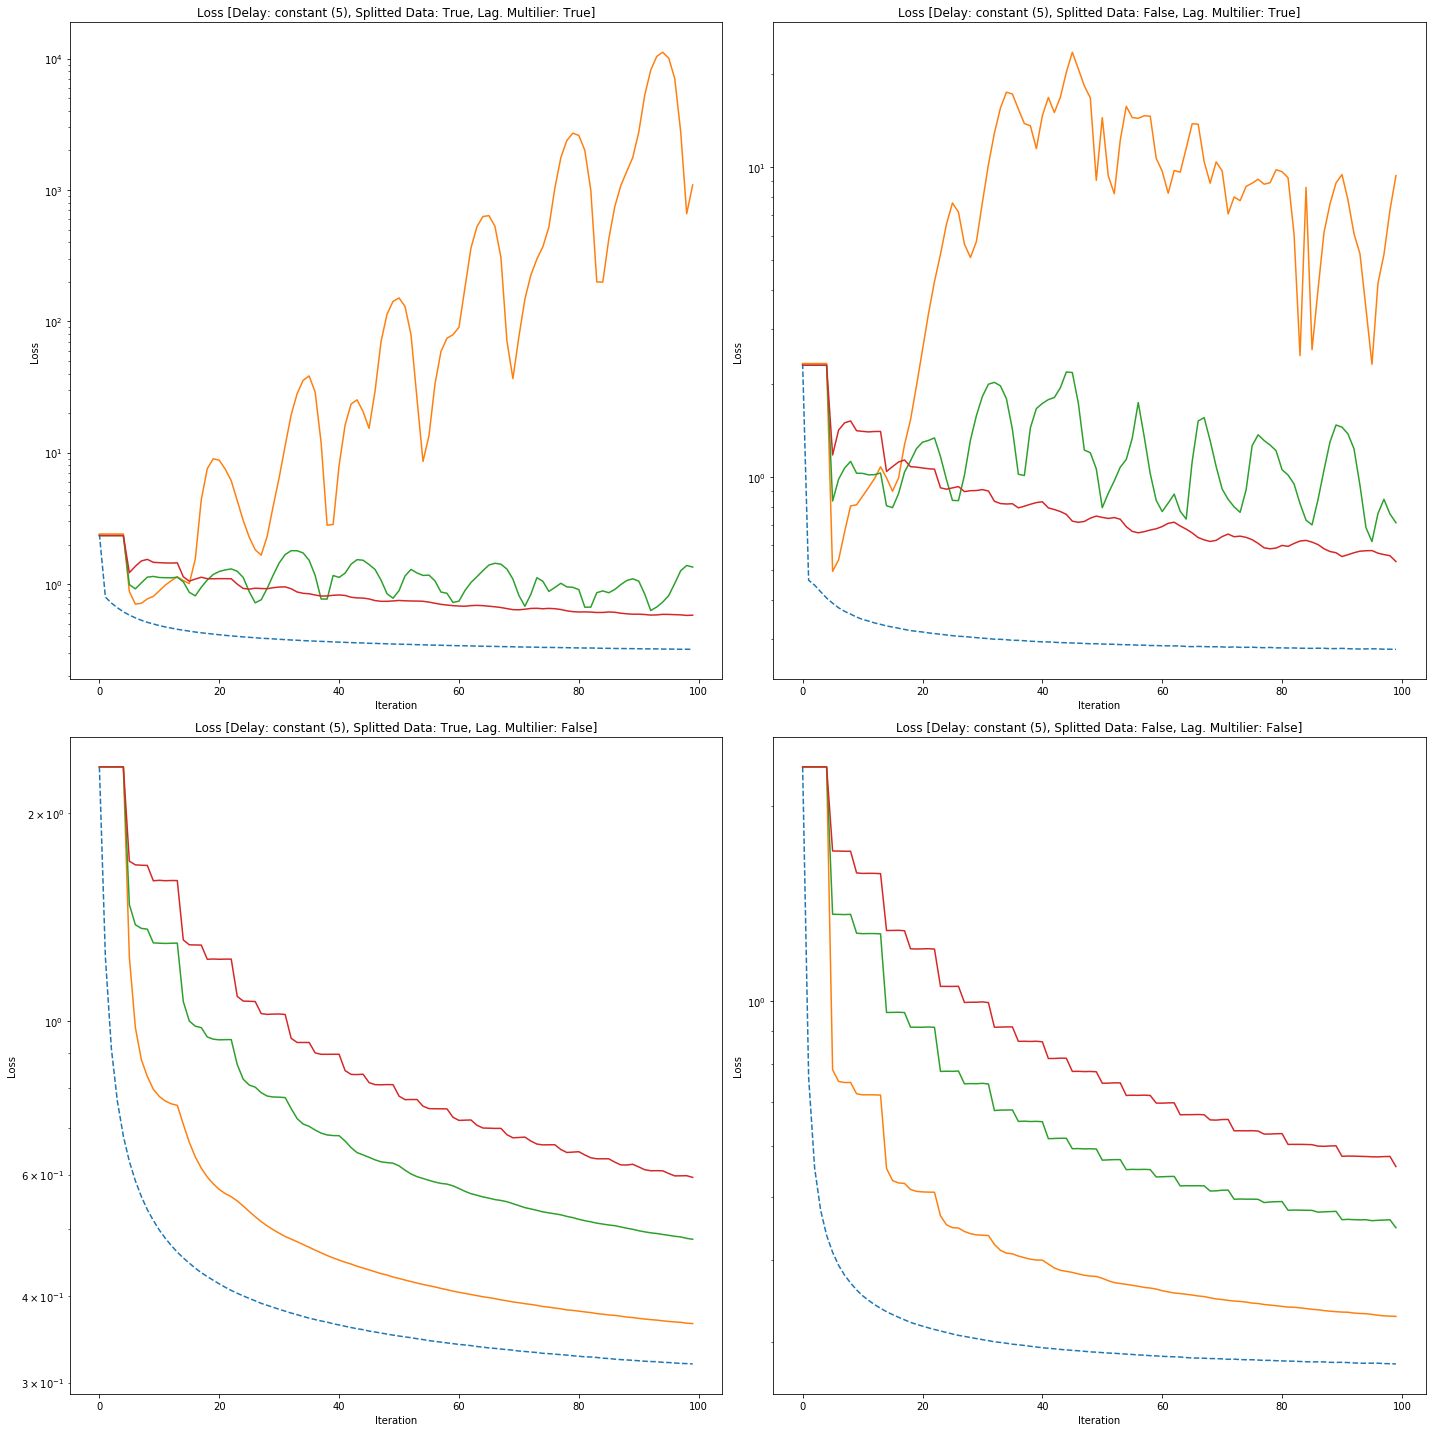

In [10]:
createDifferentRhoGraph(dm="constant", d=5, rs=[1.0, 5.0, 10.0], lr=0.001, n=5)


In [76]:
def createDifferentDelayGraph(dm, ds, r, lr, n, mult, split):
    if dm == "uniform":
        dm_title = "Uniform"
    else:
        dm_title = "Constant"
    colors = plt.cm.RdBu(np.linspace(0,1,len(ds)))[::-1]
    delayFrom, delayTo = ds[0], ds[len(ds) - 1]
    baselineData = pd.read_csv(baseline(mult, split, r, lr, n), header=None)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), gridspec_kw = {'wspace':0.2, 'hspace':0})
    fig.suptitle(f"Distribution: {dm_title}, Splitted Data: {split}, Lag. Multilier: {mult}", fontsize=20)
    ax[0].set_prop_cycle('color', colors)
    ax[0].set_title(f"Cross Entropy Loss", size=20)
    ax[0].set_yscale('log')
    ax[0].set_xlabel('Iteration', size=20)
    ax[0].set_ylabel('Loss', size=20)
    for d in ds:
        data = pd.read_csv(filename(dm, d, mult, split, r, lr, n), header=None)
        ax[0].plot(data)
    ax[1].set_prop_cycle('color', colors)
    ax[1].set_title(f"Accuracy", size=20)
    ax[1].set_xlabel('Iteration', size=20)
    ax[1].set_ylabel('Acc.', size=20)
    for d in ds:
        data = pd.read_csv(filename_acc(dm, d, mult, split, r, lr, n), header=None)
        ax[1].plot(data)
    
    # fig.tight_layout()
    plt.savefig(f'/Users/rene/University/master/thesis/thesis/figures/thesis_admmlogistic_delays_dm{dm}_mult{mult}_split{split}.pdf')
    plt.show()



data/loss_dmnone_d1_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d1_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d2_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d3_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d4_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d5_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d6_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d7_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d8_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d10_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d1_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d2_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d3_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d4_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d5_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d6_multTrue_splitTrue_r10.0_

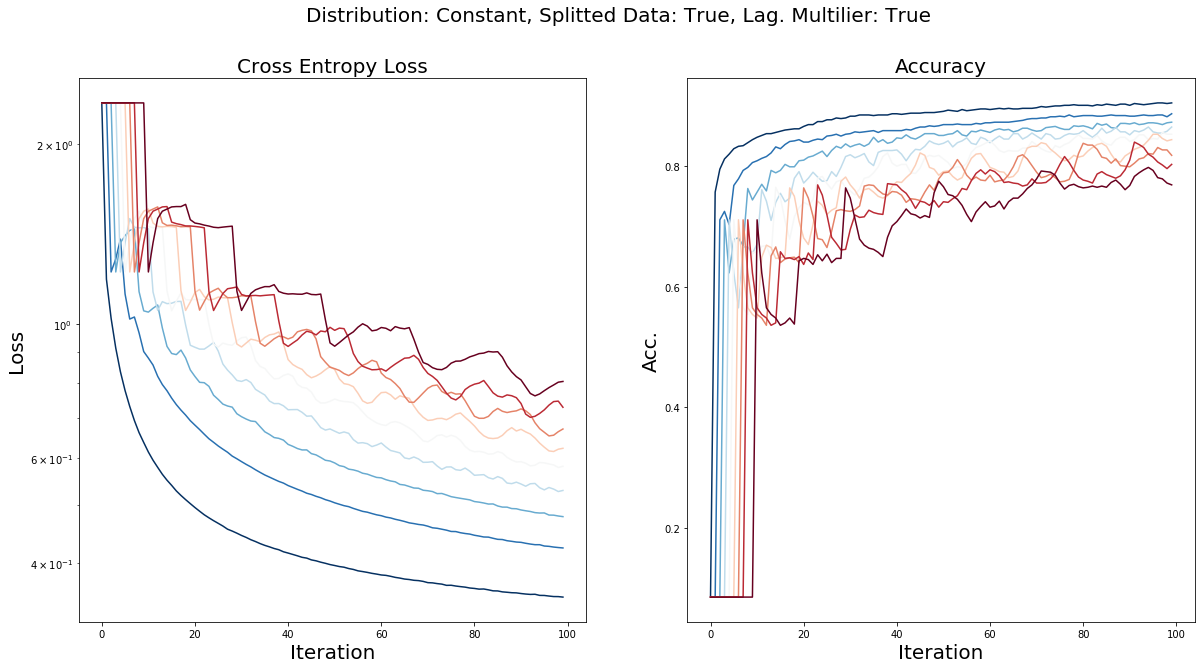

data/loss_dmnone_d1_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d1_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d2_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d3_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d4_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d5_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d6_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d7_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d8_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d10_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d1_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d2_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d3_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d4_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d5_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d6_multTrue_s

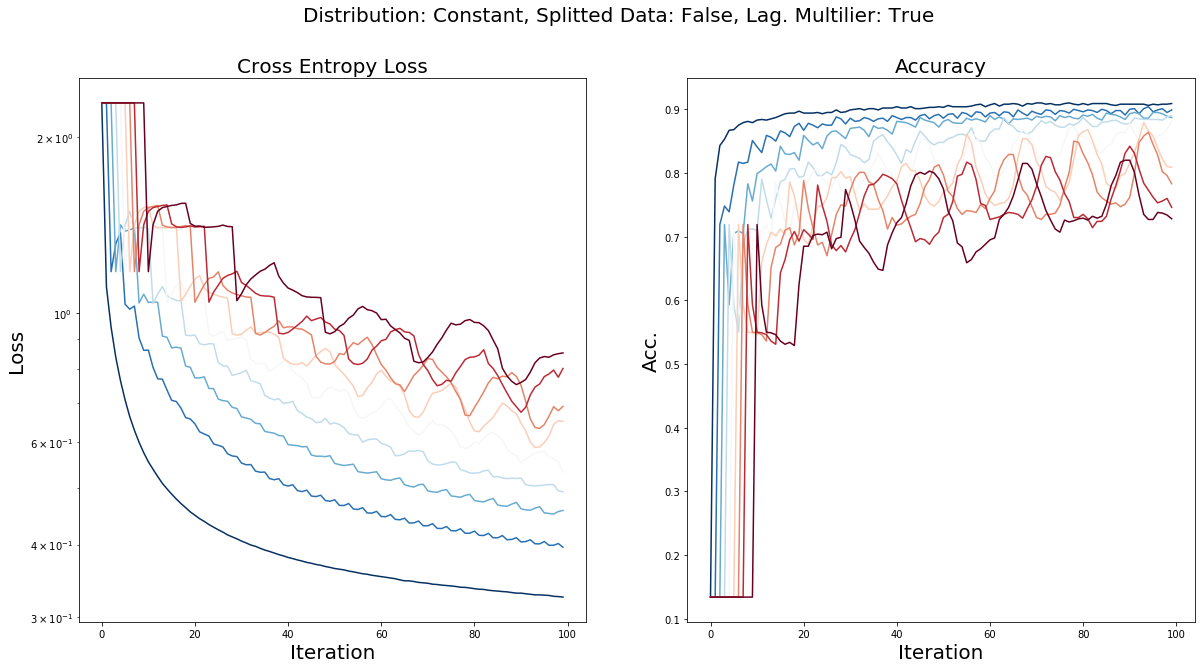

data/loss_dmnone_d1_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d1_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d2_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d3_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d4_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d5_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d6_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d7_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d8_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d10_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d1_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d2_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d3_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d4_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d5_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d6_multFalse_

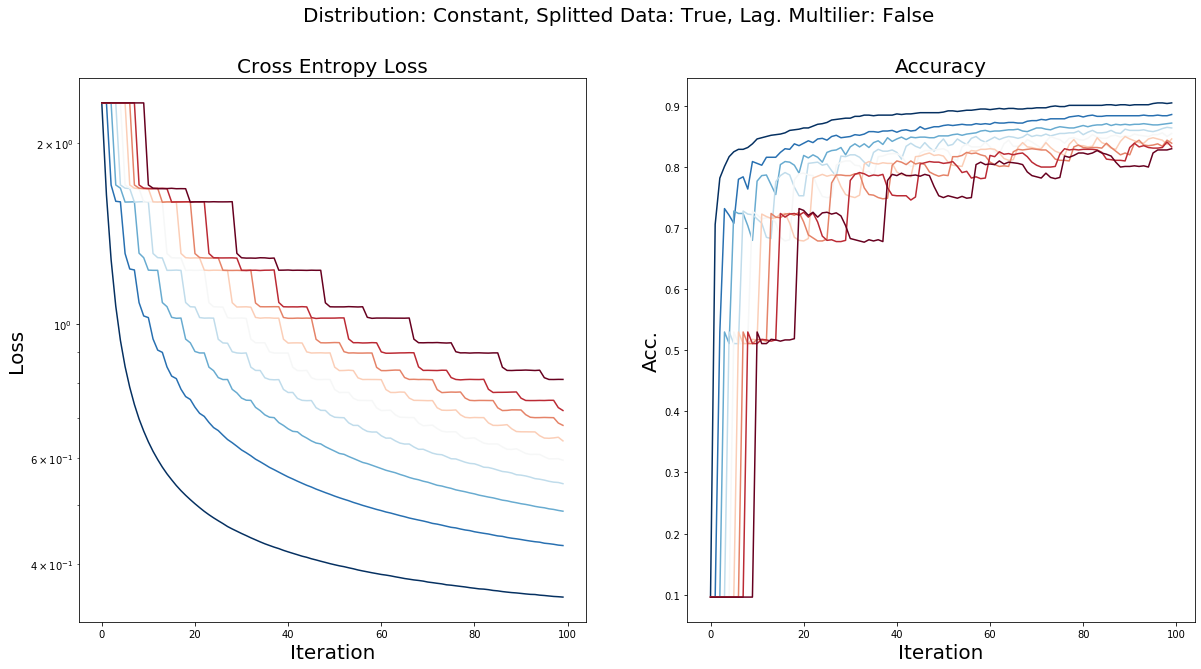

data/loss_dmnone_d1_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d1_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d2_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d3_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d4_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d5_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d6_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d7_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d8_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmconstant_d10_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d1_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d2_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d3_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d4_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/acc_dmconstant_d5_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/acc_dmconstan

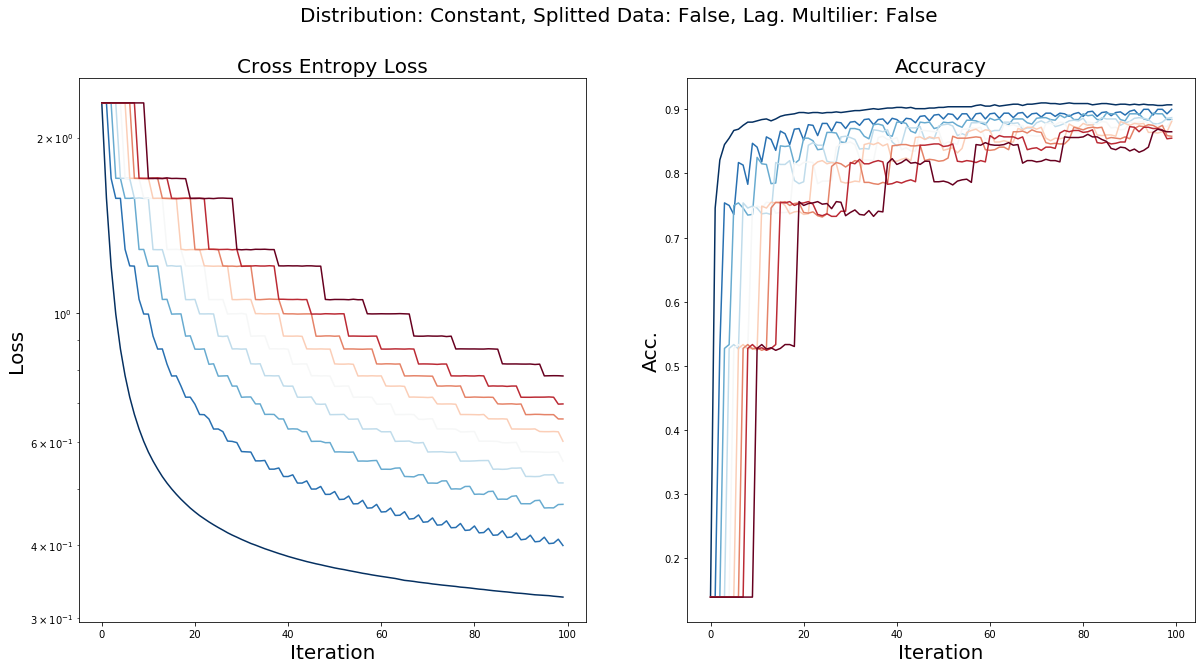

data/loss_dmnone_d1_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d1_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d2_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d3_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d4_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d5_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d6_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d7_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d8_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d10_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmuniform_d1_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmuniform_d2_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmuniform_d3_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmuniform_d4_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmuniform_d5_multTrue_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmuniform_d6_multTrue_splitTrue_r10.0_lr0.001_n5.csv


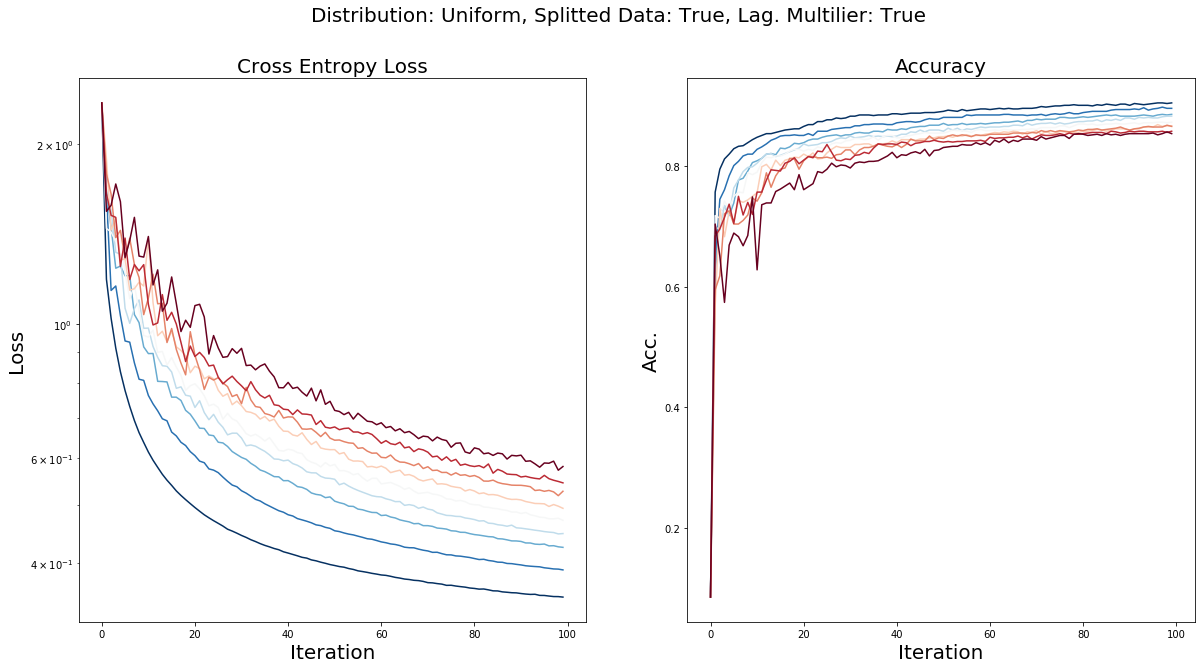

data/loss_dmnone_d1_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d1_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d2_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d3_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d4_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d5_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d6_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d7_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d8_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d10_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/acc_dmuniform_d1_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/acc_dmuniform_d2_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/acc_dmuniform_d3_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/acc_dmuniform_d4_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/acc_dmuniform_d5_multTrue_splitFalse_r10.0_lr0.001_n5.csv
data/acc_dmuniform_d6_multTrue_splitFalse_r10.0

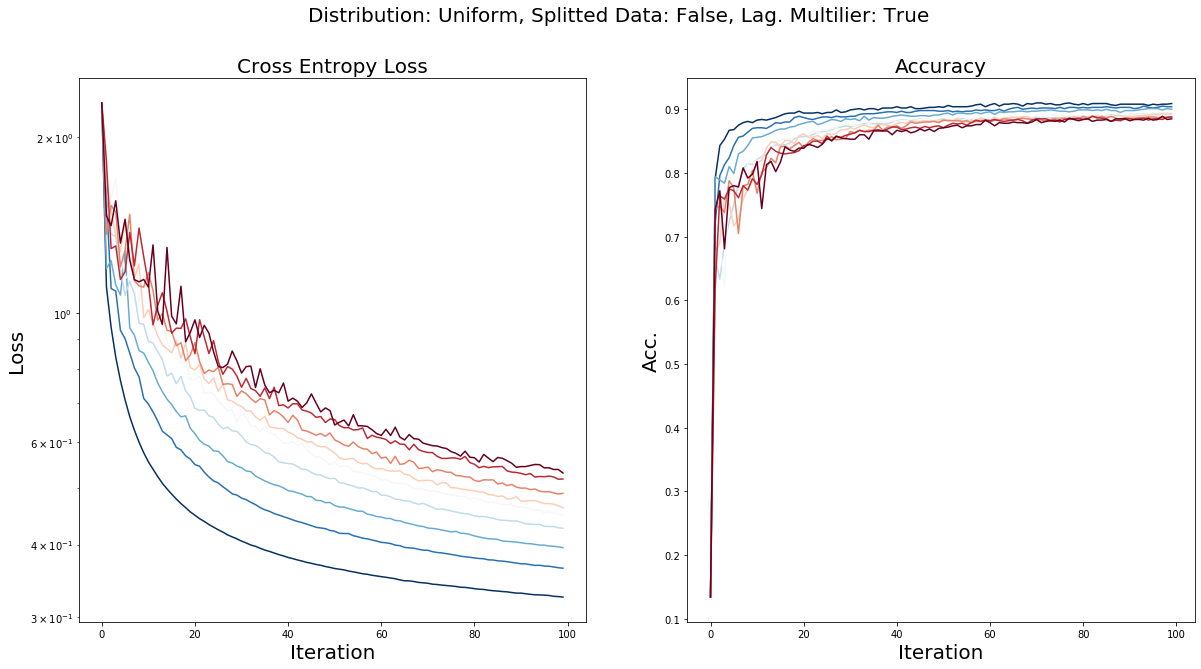

data/loss_dmnone_d1_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d1_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d2_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d3_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d4_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d5_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d6_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d7_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d8_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d10_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmuniform_d1_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmuniform_d2_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmuniform_d3_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmuniform_d4_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmuniform_d5_multFalse_splitTrue_r10.0_lr0.001_n5.csv
data/acc_dmuniform_d6_multFalse_splitTrue_r10.0

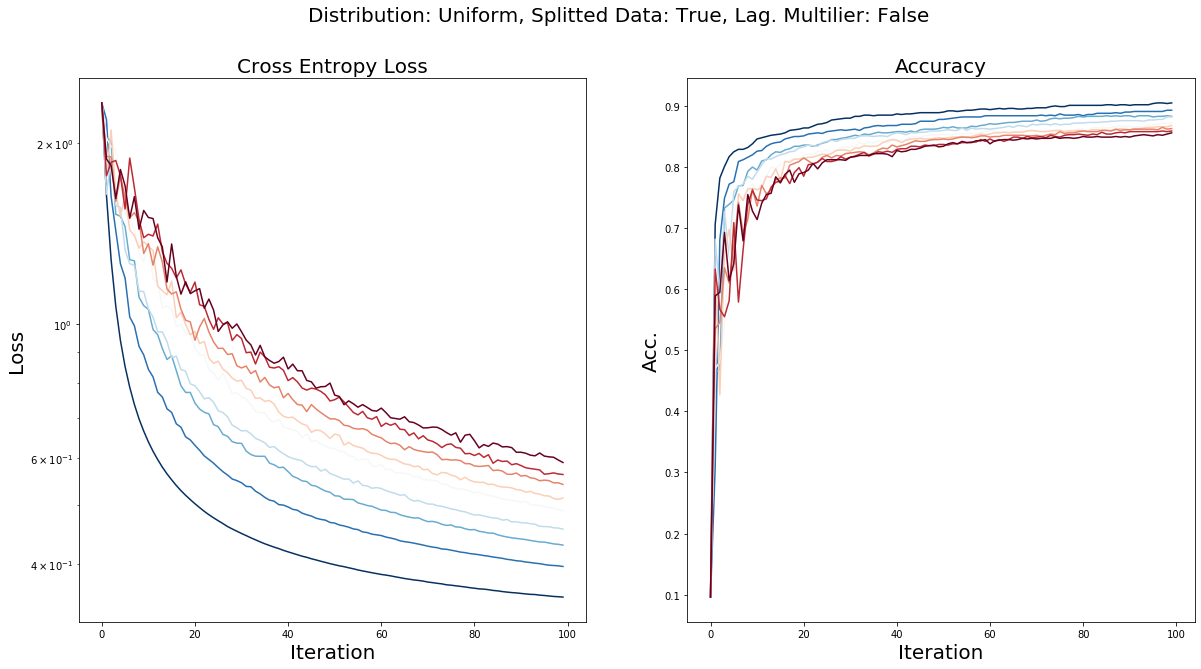

data/loss_dmnone_d1_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d1_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d2_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d3_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d4_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d5_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d6_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d7_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d8_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/loss_dmuniform_d10_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/acc_dmuniform_d1_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/acc_dmuniform_d2_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/acc_dmuniform_d3_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/acc_dmuniform_d4_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/acc_dmuniform_d5_multFalse_splitFalse_r10.0_lr0.001_n5.csv
data/acc_dmuniform_d6_multFalse_

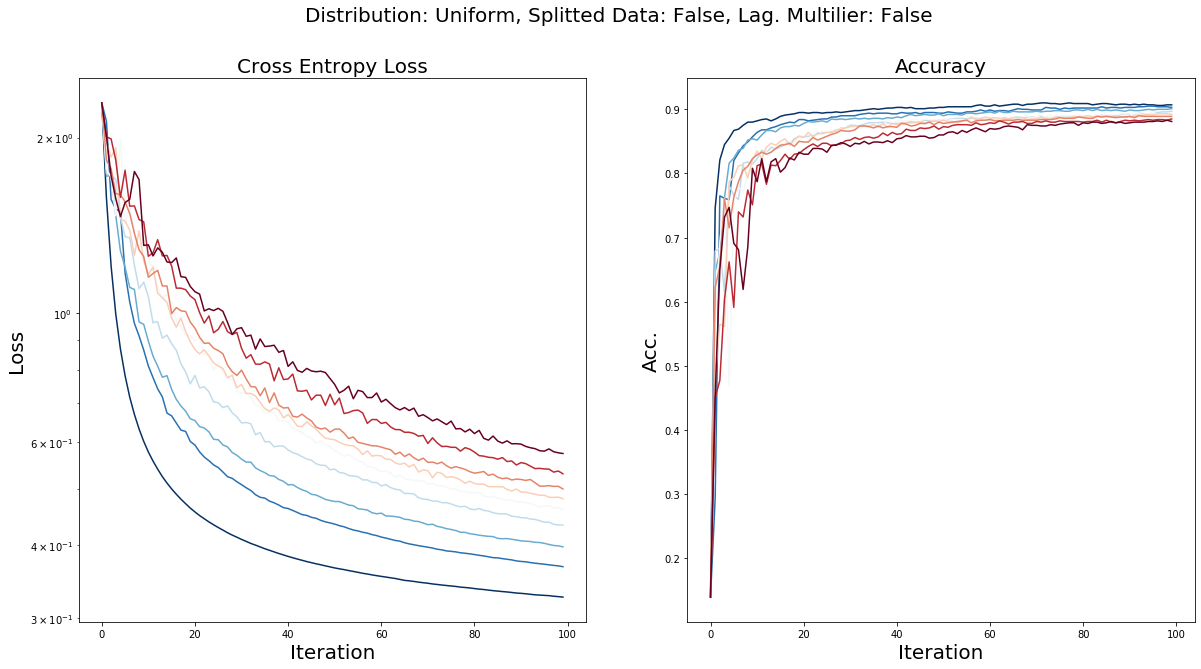

In [77]:
createDifferentDelayGraph(n=5, lr=0.001, dm="constant", r=10.0, ds=[1, 2, 3, 4, 5, 6, 7, 8, 10], mult=True, split=True)
createDifferentDelayGraph(n=5, lr=0.001, dm="constant", r=10.0, ds=[1, 2, 3, 4, 5, 6, 7, 8, 10], mult=True, split=False)
createDifferentDelayGraph(n=5, lr=0.001, dm="constant", r=10.0, ds=[1, 2, 3, 4, 5, 6, 7, 8, 10], mult=False, split=True)
createDifferentDelayGraph(n=5, lr=0.001, dm="constant", r=10.0, ds=[1, 2, 3, 4, 5, 6, 7, 8, 10], mult=False, split=False)

createDifferentDelayGraph(n=5, lr=0.001, dm="uniform", r=10.0, ds=[1, 2, 3, 4, 5, 6, 7, 8, 10], mult=True, split=True)
createDifferentDelayGraph(n=5, lr=0.001, dm="uniform", r=10.0, ds=[1, 2, 3, 4, 5, 6, 7, 8, 10], mult=True, split=False)
createDifferentDelayGraph(n=5, lr=0.001, dm="uniform", r=10.0, ds=[1, 2, 3, 4, 5, 6, 7, 8, 10], mult=False, split=True)
createDifferentDelayGraph(n=5, lr=0.001, dm="uniform", r=10.0, ds=[1, 2, 3, 4, 5, 6, 7, 8, 10], mult=False, split=False)













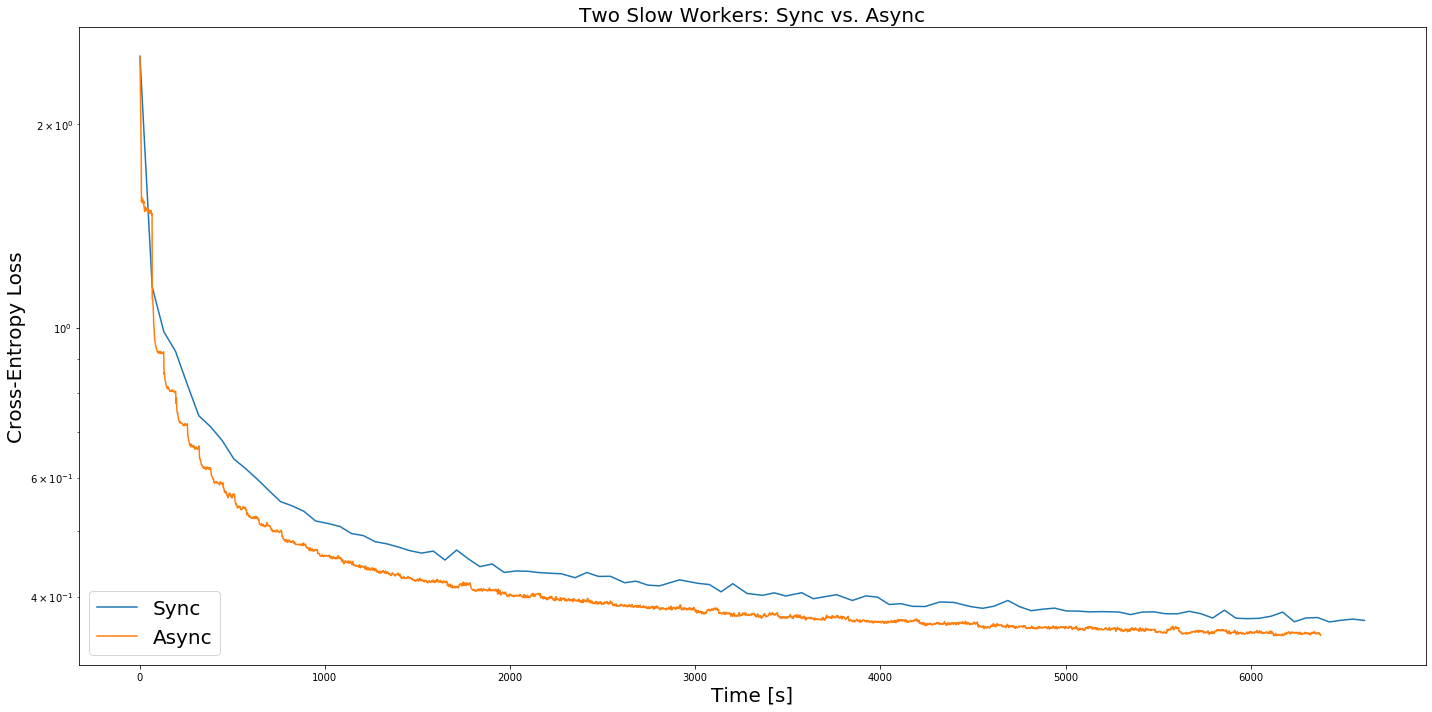

In [4]:
# Time plots
colors = plt.cm.RdBu(np.linspace(0,1,2)[::-1]
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
syncData = pd.read_csv("data/loss_async_twoslow_multTrue_splitTrue_b5_r10.0_lr0.01_n5.pdf.csv", sep=";", header=None)
asyncData = pd.read_csv("data/loss_async_twoslow_multTrue_splitTrue_b1_r10.0_lr0.01_n5.pdf.csv", sep=";", header=None)
ax.set_yscale('log')
ax.set_title(f"Two Slow Workers: Sync vs. Async", size=20)
ax.set_xlabel('Time [s]', size=20)
ax.set_ylabel('Cross-Entropy Loss', size=20)
ax.plot(syncData[0], syncData[1], label='Sync')
ax.plot(asyncData[0], asyncData[1], label='Async')
ax.legend(loc='lower left', fontsize="20")
fig.tight_layout()
plt.savefig("/Users/rene/University/master/thesis/thesis/figures/thesis_admmlogisticregression_real_twoslow_multTrue_splitTrue.pdf")